# linear regression of house rentals

In [107]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [108]:
##Import the dataset 
df= pd.read_excel('avinash home rentals.xlsx',index_col=0)
df.head()

,SizeRank,RegionName,StateName,2015-01-31 00:00:00,2015-02-28 00:00:00,2015-03-31 00:00:00,2015-04-30 00:00:00,2015-05-31 00:00:00,2015-06-30 00:00:00,2015-07-31 00:00:00,...,2023-04-30 00:00:00,2023-05-31 00:00:00,2023-06-30 00:00:00,2023-07-31 00:00:00,2023-08-31 00:00:00,2023-09-30 00:00:00,2023-10-31 00:00:00,2023-11-30 00:00:00,2023-12-31 00:00:00,2024-01-31 00:00:00
RegionID,,,,,,,,,,,,,,,,,,,,,
12447,1,Los Angeles,CA,1850.940431,1866.026504,1881.998268,1896.073966,1918.393007,1928.217830,1942.496081,...,2799.245669,2802.596859,2806.154851,2809.263085,2816.282899,2816.854133,2809.786829,2793.685687,2779.385071,2782.873417
54296,8,San Diego,CA,1725.787465,1737.198355,1747.754326,1749.318728,1762.593043,1770.088827,1789.580597,...,2970.600140,3010.362350,3038.312381,3060.735708,3063.334258,3058.979016,3043.739608,3022.616798,2998.986278,2982.807962
33839,11,San Jose,CA,2340.372710,2352.927232,2368.991329,2408.294085,2459.479596,2507.363050,2538.353303,...,3048.142589,3072.560437,3086.811329,3100.682528,3101.330330,3098.768206,3073.765497,3045.121766,3036.873765,3049.929929
20330,17,San Francisco,CA,3095.308550,3100.096296,3150.869047,3209.054567,3239.186429,3273.959455,3295.756539,...,3350.370802,3361.743774,3366.297492,3374.363586,3371.274268,3361.396762,3347.877024,3309.464795,3280.166214,3281.454013
20288,28,Sacramento,CA,1140.522225,1145.697085,1153.759010,1159.827966,1172.628211,1183.874481,1196.146793,...,2073.380393,2084.535089,2096.256217,2106.261932,2102.445958,2118.005538,2112.879799,2109.973051,2089.861237,2095.872620


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 847 entries, 12447 to 14457
Columns: 112 entries, SizeRank to 2024-01-31 00:00:00
dtypes: float64(109), int64(1), object(2)
memory usage: 747.7+ KB


In [110]:
df.shape 

(847, 112)

In [111]:
df=df.dropna()

In [112]:
df.describe()

,SizeRank,2015-01-31 00:00:00,2015-02-28 00:00:00,2015-03-31 00:00:00,2015-04-30 00:00:00,2015-05-31 00:00:00,2015-06-30 00:00:00,2015-07-31 00:00:00,2015-08-31 00:00:00,2015-09-30 00:00:00,...,2023-04-30 00:00:00,2023-05-31 00:00:00,2023-06-30 00:00:00,2023-07-31 00:00:00,2023-08-31 00:00:00,2023-09-30 00:00:00,2023-10-31 00:00:00,2023-11-30 00:00:00,2023-12-31 00:00:00,2024-01-31 00:00:00
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,...,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,516.187500,1457.127077,1464.988290,1475.272546,1488.454935,1500.771209,1513.538568,1523.224388,1529.401703,1531.626154,...,2369.665557,2383.023884,2393.361209,2404.906189,2411.003253,2406.425589,2403.715365,2397.715397,2395.286702,2394.665447
std,596.542239,513.975361,523.032965,526.845014,545.044752,553.675211,563.538363,566.678742,565.992847,564.300057,...,1020.705191,1035.389114,1055.833608,1076.674236,1072.648374,1024.995656,995.374335,985.341729,993.256229,991.067492
min,1.000000,725.690360,722.402755,726.342129,731.193101,733.541444,734.495386,733.633204,732.412951,729.880723,...,1160.685888,1159.781341,1169.403834,1152.696822,1167.065701,1173.271492,1185.410034,1163.215751,1164.858934,1178.860738
25%,145.250000,1089.843034,1103.014056,1117.778297,1126.945099,1133.620503,1136.058324,1150.959552,1148.462563,1152.932306,...,1790.740672,1795.209527,1802.884483,1808.712701,1801.639946,1803.280415,1802.323934,1802.602892,1796.438533,1794.884888
50%,316.500000,1370.674484,1368.625779,1380.447653,1389.355531,1394.205741,1407.011906,1407.631144,1421.044166,1415.445938,...,2211.216373,2212.150364,2223.793925,2231.891265,2240.114986,2245.597155,2269.299639,2267.706990,2276.326391,2269.058342
75%,650.500000,1698.340677,1700.188661,1714.325221,1739.606354,1730.873440,1747.146830,1756.186154,1780.555564,1784.511491,...,2790.738944,2778.833558,2790.910614,2803.837651,2815.668042,2816.234666,2810.438448,2804.839239,2798.245934,2811.301613
max,3736.000000,4745.803069,4885.375355,4886.897001,5188.624829,5324.159124,5452.011590,5437.153286,5358.482743,5288.776199,...,11416.084987,11618.518926,11983.736621,12242.683634,12162.654862,11372.681488,10828.961258,10640.914375,10762.877009,10788.055556


In [113]:
selected_states = ['NY', 'CA', 'TX', 'IL']
filtered_df = df[df['StateName'].isin(selected_states)]

In [ ]:
selected_states = ['NY', 'CA', 'TX', 'IL']
filtered_df = df[df['StateName'].isin(selected_states)]

Slope for NY: 2.719788359590927e-15
Slope for CA: 4.349556333981531e-15
Slope for TX: 2.257872688302745e-15
Slope for IL: 1.9903291714687193e-15


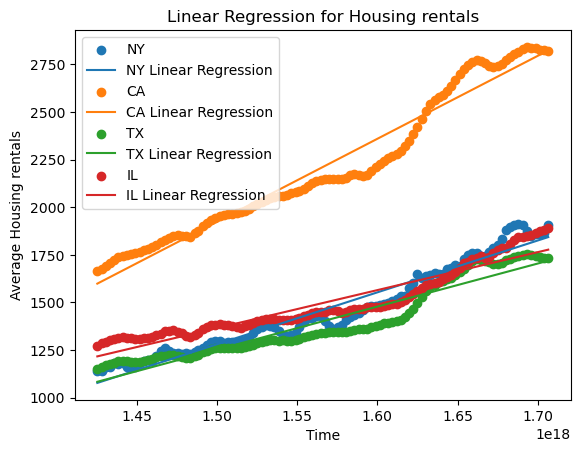

In [114]:
for state in selected_states:
    # Subset data for the current state
    state_data = filtered_df[filtered_df['StateName'] == state]
    
    # Extract columns representing dates and mean housing prices
    X = state_data.columns[4:]  # Columns representing dates
    y = state_data.iloc[:, 4:].mean(axis=0)  # Mean housing price for each month
    
    # Convert date strings to numeric timestamps
    X = pd.to_numeric(pd.to_datetime(X, errors='coerce').astype('int64'), errors='coerce').values.reshape(-1, 1)
    y = y.values.reshape(-1, 1)
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Print slope (rate of increase) for the current state
    print(f"Slope for {state}: {model.coef_[0][0]}")
    
    # Plot scatter plot and linear regression line
    plt.scatter(X, y, label=state)
    plt.plot(X, model.predict(X), label=f'{state} Linear Regression')
    plt.xlabel('Time')
    plt.ylabel('Average Housing rentals')
    plt.title('Linear Regression for Housing rentals')
    plt.legend()

plt.show()


In [61]:
for state in selected_states:
    # Subset data for the current state
    state_data = filtered_df[filtered_df['StateName'] == state]
    
    # Extract columns representing dates and mean housing prices
    X = state_data.columns[4:]  # Columns representing dates
    y = state_data.iloc[:, 4:].mean(axis=0)  # Mean housing price for each month
    
    # Convert date strings to numeric timestamps
    X = pd.to_numeric(pd.to_datetime(X, errors='coerce').astype('int64'), errors='coerce').values.reshape(-1, 1)
    y = y.values
    
    # Add a constant to the independent variable (X) for the intercept
    X = sm.add_constant(X)
    
    # Fit linear regression model
    model = sm.OLS(y, X).fit()
    
    # Print OLS regression results
    print(f"OLS Regression Results for {state}:")
    print(model.summary())

OLS Regression Results for NY:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 04 May 2024   Prob (F-statistic):                nan
Time:                        12:55:18   Log-Likelihood:                -912.04
No. Observations:                 108   AIC:                             1826.
Df Residuals:                     107   BIC:                             1829.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.505e-33

In [115]:
import pandas as pd
import statsmodels.api as sm

# Assuming filtered_df contains your dataset and selected_states contains the states you want to analyze

# Placeholder for results
results = []

for state in selected_states:
    # Subset data for the current state
    state_data = filtered_df[filtered_df['StateName'] == state]
    
    # Extract columns representing dates and mean housing prices
    X = state_data.columns[4:]  # Columns representing dates
    y = state_data.iloc[:, 4:].mean(axis=0)  # Mean housing price for each month
    
    # Convert date strings to numeric timestamps
    X = pd.to_numeric(pd.to_datetime(X, errors='coerce').astype('int64'), errors='coerce').values.reshape(-1, 1)
    y = y.values
    
    # Check if there is variation in the independent variable
    if len(set(X.flatten())) <= 1:
        print(f"No variation in independent variable for {state}. Skipping regression.")
        continue
    
    # Add a constant to the independent variable (X) for the intercept
    X = sm.add_constant(X)
    
    # Fit linear regression model
    model = sm.OLS(y, X).fit()
    
    # Print OLS regression results
    print(f"OLS Regression Results for {state}:")
    print(model.summary())
    
    # Append results to the list
    results.append((state, model))

# Example usage of results
for state, model in results:
    print(f"R-squared for {state}: {model.rsquared}")


OLS Regression Results for NY:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 04 May 2024   Prob (F-statistic):                nan
Time:                        18:38:23   Log-Likelihood:                -698.40
No. Observations:                 108   AIC:                             1399.
Df Residuals:                     107   BIC:                             1401.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        5.97e-34

In [ ]:
print("Data type of X:", X.dtype)
print("Data type of y:", y.dtype)


OLS Regression Results for NY:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 04 May 2024   Prob (F-statistic):                nan
Time:                        18:38:29   Log-Likelihood:                -698.40
No. Observations:                 108   AIC:                             1399.
Df Residuals:                     107   BIC:                             1401.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        5.97e-34

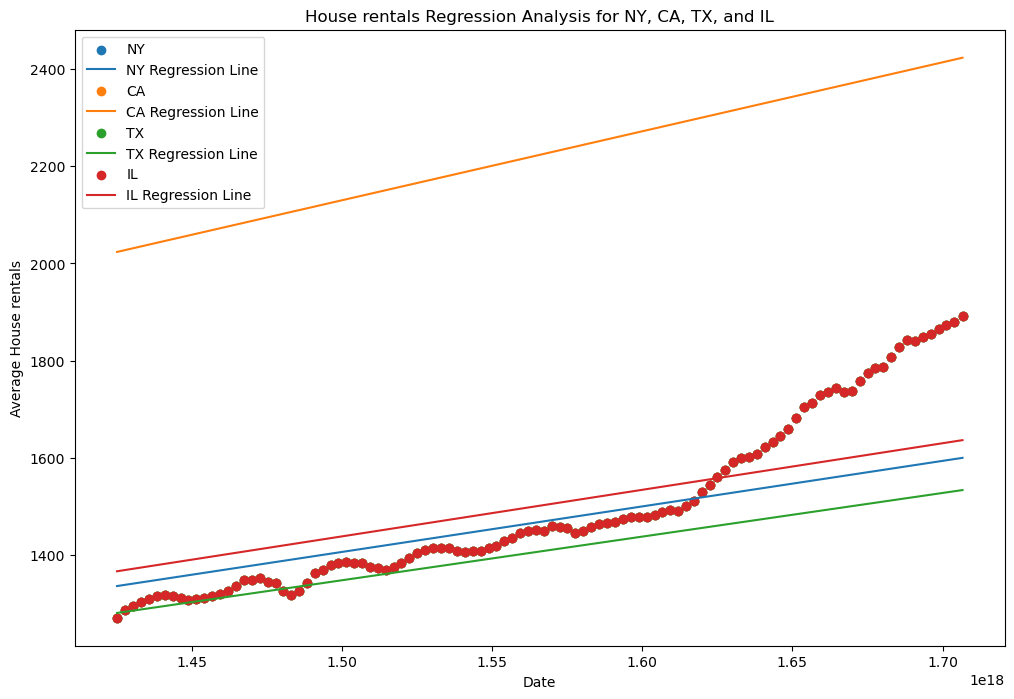

In [116]:
selected_data = df[df['StateName'].isin(selected_states)]

# Define a function for linear regression analysis
def perform_linear_regression(data):
    X = pd.to_numeric(pd.to_datetime(data.columns[4:], errors='coerce'), errors='coerce')
    y = data.iloc[:, 4:].mean(axis=0)
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model

# Perform linear regression analysis for each state
regression_results = {}

for state in selected_states:
    state_data = selected_data[selected_data['StateName'] == state]
    model = perform_linear_regression(state_data)
    regression_results[state] = model

# Print OLS regression results
for state, model in regression_results.items():
    print(f"OLS Regression Results for {state}:")
    print(model.summary())
    print("\n")

# Plot regression lines
plt.figure(figsize=(12, 8))
for state, model in regression_results.items():
    X = pd.to_numeric(pd.to_datetime(state_data.columns[4:], errors='coerce'), errors='coerce')
    y = state_data.iloc[:, 4:].mean(axis=0)
    plt.scatter(X, y, label=state)
    plt.plot(X, model.predict(sm.add_constant(X)), label=f"{state} Regression Line")

plt.title("House rentals Regression Analysis for NY, CA, TX, and IL")
plt.xlabel("Date")
plt.ylabel("Average House rentals")
plt.legend()
plt.show()

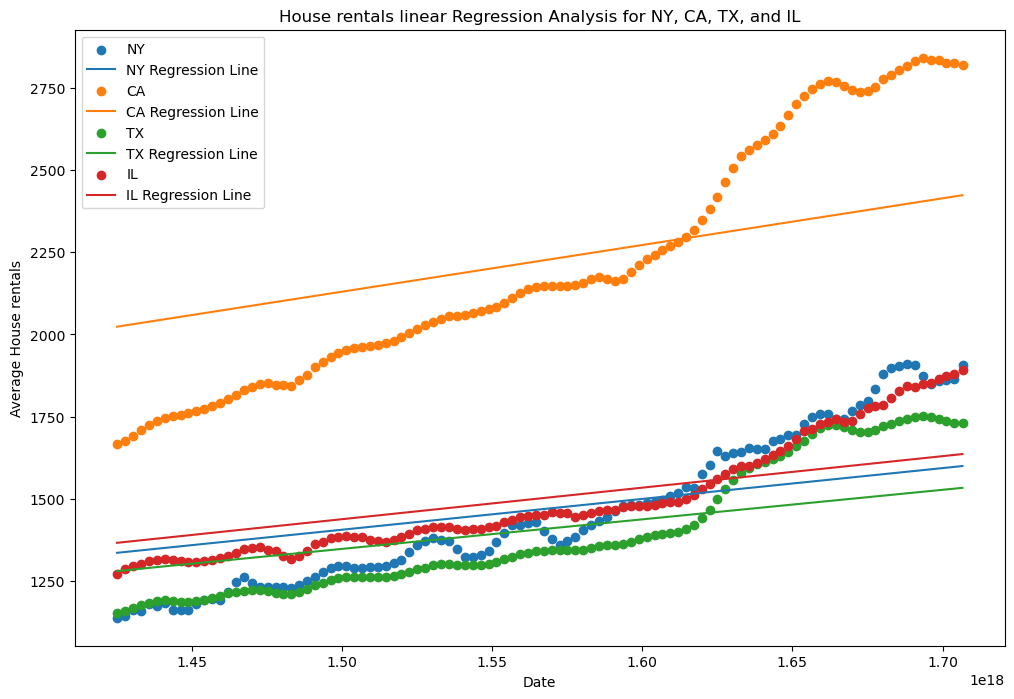

In [117]:
plt.figure(figsize=(12, 8))
for state, model in regression_results.items():
    state_data = selected_data[selected_data['StateName'] == state]  # Select data for the current state
    X = pd.to_numeric(pd.to_datetime(state_data.columns[4:], errors='coerce'), errors='coerce')
    y = state_data.iloc[:, 4:].mean(axis=0)
    plt.scatter(X, y, label=state)
    plt.plot(X, model.predict(sm.add_constant(X)), label=f"{state} Regression Line")

plt.title("House rentals linear Regression Analysis for NY, CA, TX, and IL")
plt.xlabel("Date")
plt.ylabel("Average House rentals")
plt.legend()
plt.show()

# to the house values dataset:

In [105]:
##Import the dataset 
df2= pd.read_excel('avinash home values.xlsx',index_col=0)
df2.head()

,SizeRank,RegionName,StateName,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-30 00:00:00,2000-05-31 00:00:00,2000-06-30 00:00:00,2000-07-31 00:00:00,...,2023-04-30 00:00:00,2023-05-31 00:00:00,2023-06-30 00:00:00,2023-07-31 00:00:00,2023-08-31 00:00:00,2023-09-30 00:00:00,2023-10-31 00:00:00,2023-11-30 00:00:00,2023-12-31 00:00:00,2024-01-31 00:00:00
RegionID,,,,,,,,,,,,,,,,,,,,,
6181,0,New York,NY,234915.903456,236166.082743,237445.862450,239908.379088,242407.973811,245094.718534,247944.847563,...,739489.907800,739299.750894,739576.160813,738694.410253,736816.497143,734328.683326,731285.260808,728478.273005,727214.709173,727695.447429
12447,1,Los Angeles,CA,216214.515791,216541.888106,217500.850345,219414.410944,221804.205891,224115.621198,226463.125899,...,867003.014779,867301.447266,872921.205452,883854.510510,898828.146472,914166.701096,926795.320889,935239.745984,939865.188855,936853.151906
39051,2,Houston,TX,100075.081928,100049.655481,99911.208998,99870.287193,99855.049184,100023.492841,100229.881270,...,259101.712971,259361.513921,260225.538545,261160.008990,262109.685147,262562.491385,262715.139742,262562.000517,262360.497882,262579.880874
17426,3,Chicago,IL,136774.897675,136811.439808,137153.411761,138036.573193,139166.463695,140372.558002,141467.332310,...,269641.214146,270598.186436,271657.169117,272883.086112,274615.695487,276280.054705,277285.346255,277764.070953,277679.504942,277599.383050
6915,4,San Antonio,TX,96315.506283,96404.924158,96474.684500,96600.444862,96167.628088,95570.345345,94918.317328,...,258025.535679,257797.541861,258104.393585,258325.241328,258459.528498,258019.910265,257189.679090,255945.726734,254461.035877,253378.159788


In [123]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4013 entries, 6181 to 47855
Columns: 292 entries, SizeRank to 2024-01-31 00:00:00
dtypes: float64(289), int64(1), object(2)
memory usage: 9.0+ MB


In [124]:
df2.shape 

(4013, 292)

In [125]:
df2.describe()

,SizeRank,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-30 00:00:00,2000-05-31 00:00:00,2000-06-30 00:00:00,2000-07-31 00:00:00,2000-08-31 00:00:00,2000-09-30 00:00:00,...,2023-04-30 00:00:00,2023-05-31 00:00:00,2023-06-30 00:00:00,2023-07-31 00:00:00,2023-08-31 00:00:00,2023-09-30 00:00:00,2023-10-31 00:00:00,2023-11-30 00:00:00,2023-12-31 00:00:00,2024-01-31 00:00:00
count,4013.000000,1.738000e+03,1.745000e+03,1.753000e+03,1.755000e+03,1.755000e+03,1.756000e+03,1.757000e+03,1.759000e+03,1.769000e+03,...,3.694000e+03,3.695000e+03,3.695000e+03,3.695000e+03,3.695000e+03,3.695000e+03,3.718000e+03,3.782000e+03,3.836000e+03,4.013000e+03
mean,11165.816347,1.926754e+05,1.928499e+05,1.929997e+05,1.944290e+05,1.962318e+05,1.982070e+05,2.002676e+05,2.024051e+05,2.041454e+05,...,4.117635e+05,4.134715e+05,4.160452e+05,4.189153e+05,4.217095e+05,4.240277e+05,4.238928e+05,4.239386e+05,4.218345e+05,4.143675e+05
std,7996.543833,1.698036e+05,1.705206e+05,1.716234e+05,1.743183e+05,1.774472e+05,1.807784e+05,1.843247e+05,1.880371e+05,1.914837e+05,...,4.725330e+05,4.735957e+05,4.766089e+05,4.811730e+05,4.858998e+05,4.903907e+05,4.927325e+05,4.934685e+05,4.912124e+05,4.810650e+05
min,0.000000,1.564947e+04,1.535160e+04,1.539727e+04,1.548804e+04,1.578700e+04,1.622710e+04,1.664179e+04,1.715312e+04,1.726310e+04,...,2.666899e+04,2.688371e+04,2.641860e+04,2.580845e+04,2.540389e+04,2.491206e+04,2.470385e+04,2.492388e+04,2.507409e+04,2.506760e+04
25%,4224.000000,9.067207e+04,9.056841e+04,9.013145e+04,9.061873e+04,9.080372e+04,9.095601e+04,9.113326e+04,9.161044e+04,9.185216e+04,...,1.609305e+05,1.614557e+05,1.625623e+05,1.631353e+05,1.640971e+05,1.644449e+05,1.637118e+05,1.629941e+05,1.625545e+05,1.621028e+05
50%,9909.000000,1.456317e+05,1.456593e+05,1.452527e+05,1.454896e+05,1.459243e+05,1.469245e+05,1.477419e+05,1.481388e+05,1.487210e+05,...,2.689704e+05,2.702068e+05,2.716572e+05,2.730930e+05,2.740693e+05,2.754240e+05,2.751792e+05,2.734962e+05,2.717483e+05,2.685453e+05
75%,17241.000000,2.315756e+05,2.318157e+05,2.324569e+05,2.346872e+05,2.367873e+05,2.392155e+05,2.418653e+05,2.446081e+05,2.471930e+05,...,4.845549e+05,4.869064e+05,4.899209e+05,4.932159e+05,4.952116e+05,4.959455e+05,4.939853e+05,4.942447e+05,4.915505e+05,4.790272e+05
max,30116.000000,1.939996e+06,1.956288e+06,1.980335e+06,2.030988e+06,2.093135e+06,2.163088e+06,2.233194e+06,2.297416e+06,2.359645e+06,...,7.346011e+06,7.344655e+06,7.342141e+06,7.365259e+06,7.392592e+06,7.411497e+06,7.407936e+06,7.382945e+06,7.330994e+06,7.248058e+06


In [126]:
df=df.dropna()

In [127]:
selected_states = ['NY', 'CA', 'TX', 'IL']
filtered_df2 = df2[df2['StateName'].isin(selected_states)]

Slope for NY: 3.087915291250809e-13
Slope for CA: 4.955453614271011e-13
Slope for TX: 1.5297614338240464e-13
Slope for IL: -3.549713346194265e-14


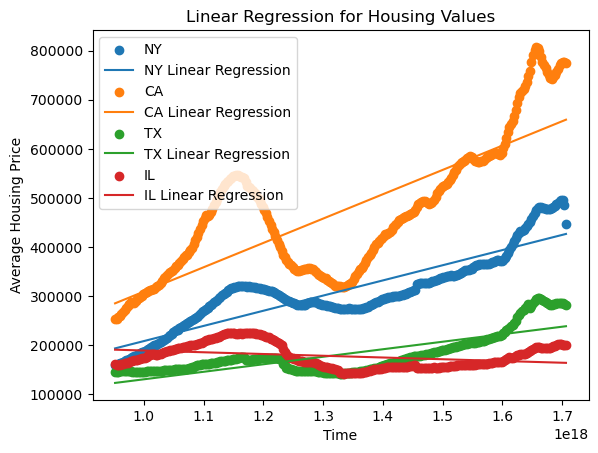

In [128]:
for state in selected_states:
    # Subset data for the current state
    state_data2 = filtered_df2[filtered_df2['StateName'] == state]
    
    # Extract columns representing dates and mean housing prices
    X = state_data2.columns[4:]  # Columns representing dates
    y = state_data2.iloc[:, 4:].mean(axis=0)  # Mean housing price for each month
    
    # Convert date strings to numeric timestamps
    X = pd.to_numeric(pd.to_datetime(X, errors='coerce').astype('int64'), errors='coerce').values.reshape(-1, 1)
    y = y.values.reshape(-1, 1)
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Print slope (rate of increase) for the current state
    print(f"Slope for {state}: {model.coef_[0][0]}")
    
    # Plot scatter plot and linear regression line
    plt.scatter(X, y, label=state)
    plt.plot(X, model.predict(X), label=f'{state} Linear Regression')
    plt.xlabel('Time')
    plt.ylabel('Average Housing Price')
    plt.title('Linear Regression for Housing Values')
    plt.legend()

plt.show()


In [129]:
for state in selected_states:
    # Subset data for the current state
    state_data2 = filtered_df2[filtered_df2['StateName'] == state]
    
    # Extract columns representing dates and mean housing prices
    X = state_data2.columns[4:]  # Columns representing dates
    y = state_data2.iloc[:, 4:].mean(axis=0)  # Mean housing price for each month
    
    # Convert date strings to numeric timestamps
    X = pd.to_numeric(pd.to_datetime(X, errors='coerce').astype('int64'), errors='coerce').values.reshape(-1, 1)
    y = y.values
    
    # Add a constant to the independent variable (X) for the intercept
    X = sm.add_constant(X)
    
    # Fit linear regression model
    model = sm.OLS(y, X).fit()
    
    # Print OLS regression results
    print(f"OLS Regression Results for {state}:")
    print(model.summary())

OLS Regression Results for NY:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 04 May 2024   Prob (F-statistic):                nan
Time:                        18:54:04   Log-Likelihood:                -3454.1
No. Observations:                 288   AIC:                             6910.
Df Residuals:                     287   BIC:                             6914.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.724e-31

In [ ]:
print("Data type of X:", X.dtype)
print("Data type of y:", y.dtype)


OLS Regression Results for NY:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 04 May 2024   Prob (F-statistic):                nan
Time:                        18:54:11   Log-Likelihood:                -3454.1
No. Observations:                 288   AIC:                             6910.
Df Residuals:                     287   BIC:                             6914.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.724e-31

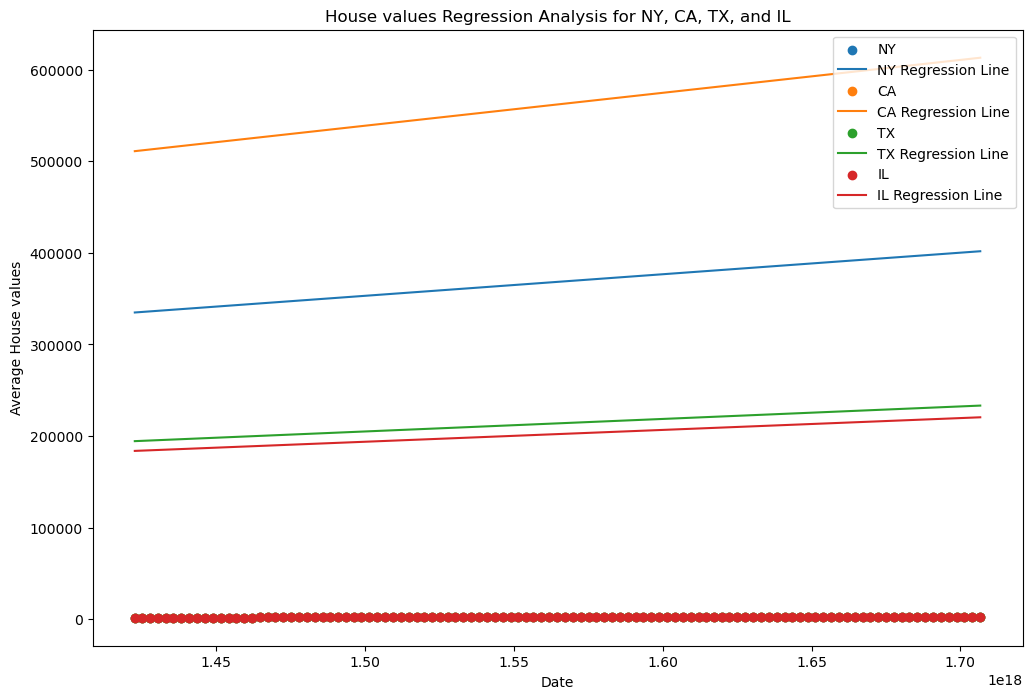

In [130]:
selected_data = df2[df2['StateName'].isin(selected_states)]

# Define a function for linear regression analysis
def perform_linear_regression(data):
    X = pd.to_numeric(pd.to_datetime(data.columns[4:], errors='coerce'), errors='coerce')
    y = data.iloc[:, 4:].mean(axis=0)
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model

# Perform linear regression analysis for each state
regression_results = {}

for state in selected_states:
    state_data2 = selected_data[selected_data['StateName'] == state]
    model = perform_linear_regression(state_data2)
    regression_results[state] = model

# Print OLS regression results
for state, model in regression_results.items():
    print(f"OLS Regression Results for {state}:")
    print(model.summary())
    print("\n")

# Plot regression lines
plt.figure(figsize=(12, 8))
for state, model in regression_results.items():
    X = pd.to_numeric(pd.to_datetime(state_data.columns[4:], errors='coerce'), errors='coerce')
    y = state_data.iloc[:, 4:].mean(axis=0)
    plt.scatter(X, y, label=state)
    plt.plot(X, model.predict(sm.add_constant(X)), label=f"{state} Regression Line")

plt.title("House values Regression Analysis for NY, CA, TX, and IL")
plt.xlabel("Date")
plt.ylabel("Average House values")
plt.legend()
plt.show()

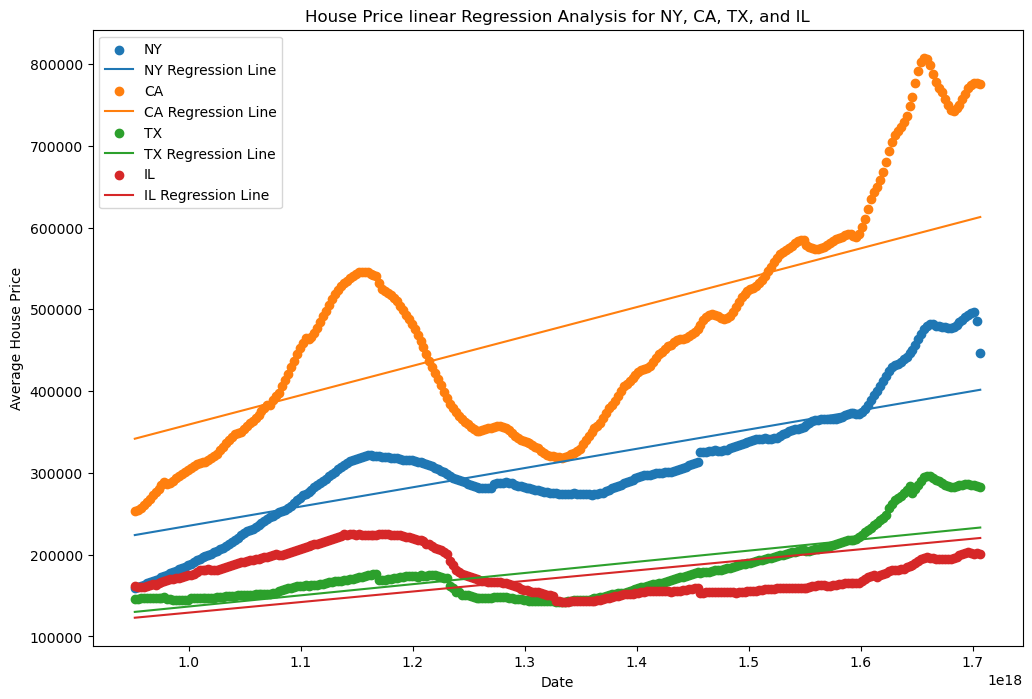

In [74]:
plt.figure(figsize=(12, 8))
for state, model in regression_results.items():
    state_data2 = selected_data[selected_data['StateName'] == state]  # Select data for the current state
    X = pd.to_numeric(pd.to_datetime(state_data.columns[4:], errors='coerce'), errors='coerce')
    y = state_data2.iloc[:, 4:].mean(axis=0)
    plt.scatter(X, y, label=state)
    plt.plot(X, model.predict(sm.add_constant(X)), label=f"{state} Regression Line")

plt.title("House Price linear Regression Analysis for NY, CA, TX, and IL")
plt.xlabel("Date")
plt.ylabel("Average House Price")
plt.legend()
plt.show()

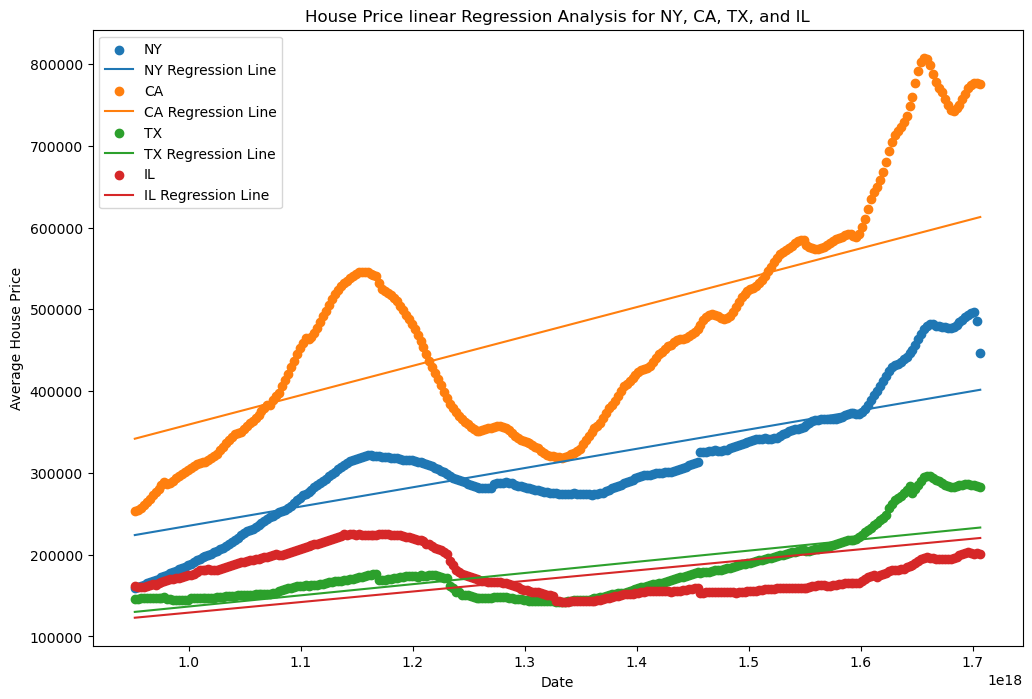

In [135]:
plt.figure(figsize=(12, 8))
for state, model in regression_results.items():
    state_data2 = selected_data[selected_data['StateName'] == state]  # Select data for the current state
    X = pd.to_numeric(pd.to_datetime(state_data.columns[4:], errors='coerce'), errors='coerce')
    y = state_data2.iloc[:, 4:].mean(axis=0)
    plt.scatter(X, y, label=state)
    plt.plot(X, model.predict(sm.add_constant(X)), label=f"{state} Regression Line")

plt.title("House Price linear Regression Analysis for NY, CA, TX, and IL")
plt.xlabel("Date")
plt.ylabel("Average House Price")
plt.legend()
plt.show()

OLS Regression Results for NY:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 04 May 2024   Prob (F-statistic):                nan
Time:                        18:55:10   Log-Likelihood:                -3454.1
No. Observations:                 288   AIC:                             6910.
Df Residuals:                     287   BIC:                             6914.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.724e-31

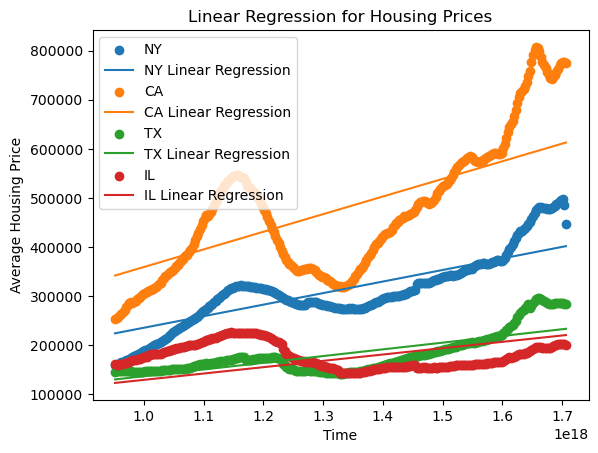

In [136]:
for state in selected_states:
    # Subset data for the current state
    state_data = filtered_df2[filtered_df2['StateName'] == state]
    
    # Extract columns representing dates and mean housing prices
    X = state_data.columns[4:]  # Columns representing dates
    y = state_data.iloc[:, 4:].mean(axis=0)  # Mean housing price for each month
    
    # Convert date strings to numeric timestamps
    X = pd.to_numeric(pd.to_datetime(X, errors='coerce').astype('int64'), errors='coerce').values.reshape(-1, 1)
    y = y.values
    
    # Add a constant to the independent variable (X) for the intercept
    X = sm.add_constant(X)
    
    # Fit linear regression model
    model = sm.OLS(y, X).fit()
    
    # Print OLS regression results
    print(f"OLS Regression Results for {state}:")
    print(model.summary())
    
    # Plot scatter plot and linear regression line
    plt.scatter(X[:, 1], y, label=state)
    plt.plot(X[:, 1], model.predict(X), label=f'{state} Linear Regression')
    plt.xlabel('Time')
    plt.ylabel('Average Housing Price')
    plt.title('Linear Regression for Housing Prices')
    plt.legend()

plt.show()


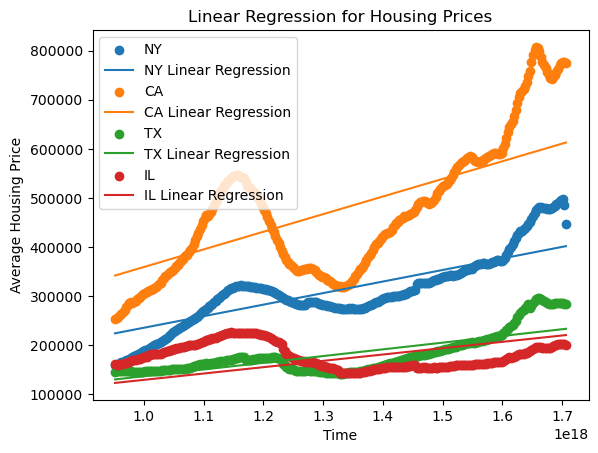

Regression Coefficients for NY:
[1.72401538e-31 2.35357136e-13]
Regression Coefficients for CA:
[2.63060017e-31 3.59121228e-13]
Regression Coefficients for TX:
[1.00097107e-31 1.36649410e-13]
Regression Coefficients for IL:
[9.46142150e-32 1.29164339e-13]


In [140]:
regression_coefficients = {}

for state in selected_states:
    # Subset data for the current state
    state_data = filtered_df2[filtered_df2['StateName'] == state]
    
    # Extract columns representing dates and mean housing prices
    X = state_data.columns[4:]  # Columns representing dates
    y = state_data.iloc[:, 4:].mean(axis=0)  # Mean housing price for each month
    
    # Convert date strings to numeric timestamps
    X = pd.to_numeric(pd.to_datetime(X, errors='coerce').astype('int64'), errors='coerce').values.reshape(-1, 1)
    y = y.values
    
    # Add a constant to the independent variable (X) for the intercept
    X = sm.add_constant(X)
    
    # Fit linear regression model
    model = sm.OLS(y, X).fit()
    
    # Store regression coefficients
    regression_coefficients[state] = model.params

    # Plot scatter plot and linear regression line
    plt.scatter(X[:, 1], y, label=state)
    plt.plot(X[:, 1], model.predict(X), label=f'{state} Linear Regression')
    plt.xlabel('Time')
    plt.ylabel('Average Housing Price')
    plt.title('Linear Regression for Housing Prices')
    plt.legend()

plt.show()

# Access the regression coefficients for each state
for state, coef in regression_coefficients.items():
    print(f"Regression Coefficients for {state}:")
    print(coef)


Slope for NY: 3.087915291250809e-13
Slope for CA: 4.955453614271011e-13
Slope for TX: 1.5297614338240464e-13
Slope for IL: -3.549713346194265e-14


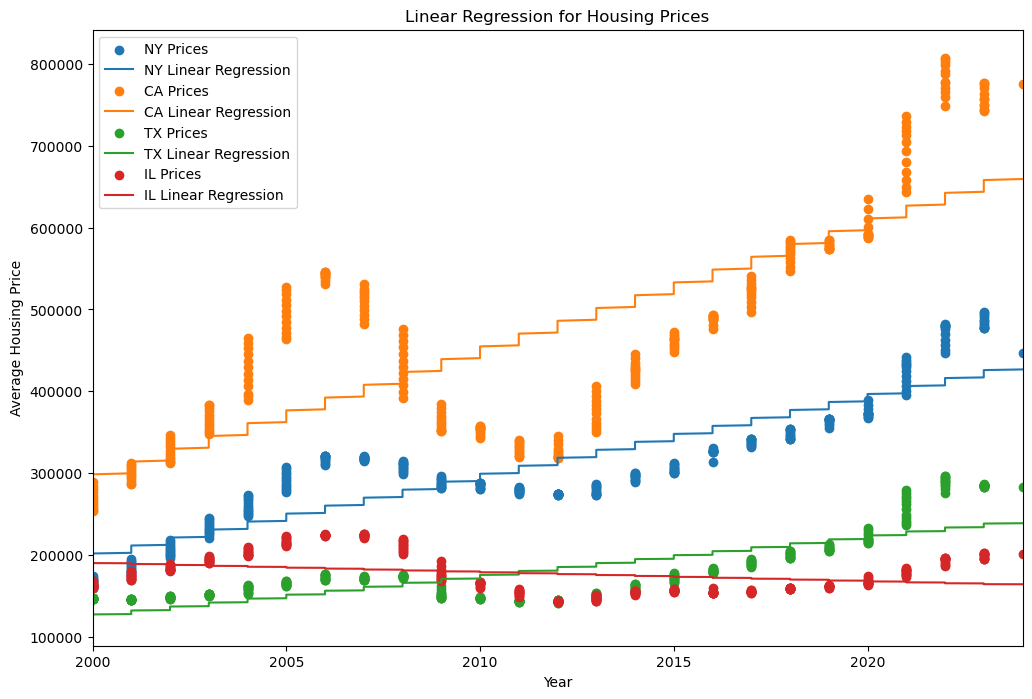

In [141]:
plt.figure(figsize=(12, 8))

for state in selected_states:
    # Subset data for the current state
    state_data = filtered_df2[filtered_df2['StateName'] == state]
    
    # Extract columns representing dates and mean housing prices
    X = state_data.columns[4:]  # Columns representing dates
    y = state_data.iloc[:, 4:].mean(axis=0)  # Mean housing price for each month
    
    # Convert date strings to numeric timestamps
    X_timestamp = pd.to_numeric(pd.to_datetime(X, errors='coerce').astype('int64'), errors='coerce')
    X_year = pd.to_datetime(X, errors='coerce').year
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X_timestamp.values.reshape(-1, 1), y.values.reshape(-1, 1))
    
    # Print slope (rate of increase) for the current state
    print(f"Slope for {state}: {model.coef_[0][0]}")
    
    # Plot scatter plot and linear regression line
    plt.scatter(X_year, y, label=f"{state} Prices")
    plt.plot(X_year, model.predict(X_timestamp.values.reshape(-1, 1)), label=f'{state} Linear Regression')
    
plt.xlabel('Year')
plt.ylabel('Average Housing Price')
plt.title('Linear Regression for Housing Prices')
plt.legend()
plt.xlim(2000, 2024)
plt.show()


# comparisoin

In [137]:
house_values_selected_states.dropna(inplace=True)
house_rentals_selected_states.dropna(inplace=True)

In [138]:
# Convert column labels to strings to handle NaN values
house_values_selected_states.columns = house_values_selected_states.columns.astype(str)
house_rentals_selected_states.columns = house_rentals_selected_states.columns.astype(str)

# Drop rows with missing values in both datasets
house_values_selected_states.dropna(inplace=True)
house_rentals_selected_states.dropna(inplace=True)

# Find the closest date to 1/31/2022
target_date = '1/31/2022'
value_date_column = house_values_selected_states.columns[
    house_values_selected_states.columns.str.contains('2022', na=False)].min()
rental_date_column = house_rentals_selected_states.columns[
    house_rentals_selected_states.columns.str.contains('2022', na=False)].min()

# Extract column index for the closest date to 1/31/2022
value_column_index = house_values_selected_states.columns.get_loc(value_date_column)
rental_column_index = house_rentals_selected_states.columns.get_loc(rental_date_column)

# Prepare data for regression analysis
X_values = house_values_selected_states.iloc[:, value_column_index].values.reshape(-1, 1)
Y_values = house_values_selected_states[value_date_column]

X_rentals = house_rentals_selected_states.iloc[:, rental_column_index].values.reshape(-1, 1)
Y_rentals = house_rentals_selected_states[rental_date_column]


In [77]:
print(house_values_selected_states.columns)
print(house_rentals_selected_states.columns)


Index(['RegionID', 'SizeRank', 'RegionName', 'StateName',
       '2000-01-31 00:00:00', '2000-02-29 00:00:00', '2000-03-31 00:00:00',
       '2000-04-30 00:00:00', '2000-05-31 00:00:00', '2000-06-30 00:00:00',
       ...
       '2023-04-30 00:00:00', '2023-05-31 00:00:00', '2023-06-30 00:00:00',
       '2023-07-31 00:00:00', '2023-08-31 00:00:00', '2023-09-30 00:00:00',
       '2023-10-31 00:00:00', '2023-11-30 00:00:00', '2023-12-31 00:00:00',
       '2024-01-31 00:00:00'],
      dtype='object', length=293)
Index(['RegionID', 'SizeRank', 'RegionName', 'StateName',
       '2015-01-31 00:00:00', '2015-02-28 00:00:00', '2015-03-31 00:00:00',
       '2015-04-30 00:00:00', '2015-05-31 00:00:00', '2015-06-30 00:00:00',
       ...
       '2023-04-30 00:00:00', '2023-05-31 00:00:00', '2023-06-30 00:00:00',
       '2023-07-31 00:00:00', '2023-08-31 00:00:00', '2023-09-30 00:00:00',
       '2023-10-31 00:00:00', '2023-11-30 00:00:00', '2023-12-31 00:00:00',
       '2024-01-31 00:00:00'],
      

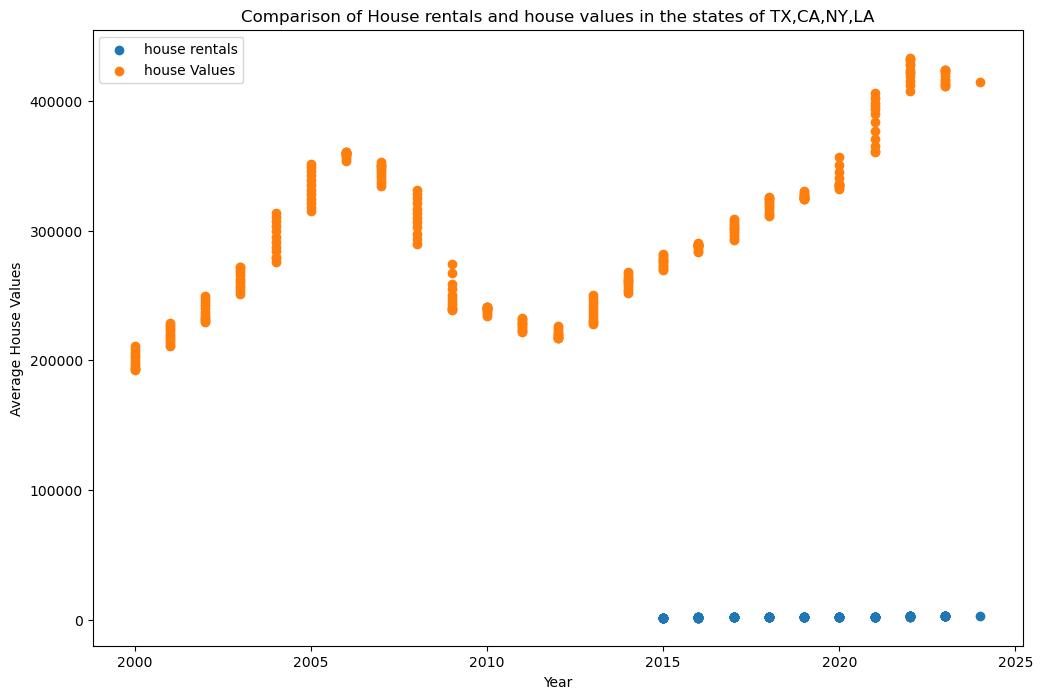

In [142]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load data from the first Excel file
file1 = "avinash home rentals.xlsx"
df1 = pd.read_excel(file1)

# Load data from the second Excel file
file2 = "avinash home values.xlsx"
df2 = pd.read_excel(file2)

# Extract columns representing dates and mean house rental prices from the first dataset
X_rentals_1 = df1.columns[4:]  # Columns representing dates
y_rentals_1 = df1.iloc[:, 4:].mean(axis=0)  # Mean house rental prices for each month

# Extract columns representing dates and mean house rental prices from the second dataset
X_rentals_2 = df2.columns[4:]  # Columns representing dates
y_rentals_2 = df2.iloc[:, 4:].mean(axis=0)  # Mean house rental prices for each month

# Extract columns representing dates and mean house values from the first dataset
X_values_1 = df1.columns[4:]  # Columns representing dates
y_values_1 = df1.iloc[:, 4:].mean(axis=0)  # Mean house values for each month

# Extract columns representing dates and mean house values from the second dataset
X_values_2 = df2.columns[4:]  # Columns representing dates
y_values_2 = df2.iloc[:, 4:].mean(axis=0)  # Mean house values for each month

# Convert date strings to numeric timestamps and extract the year information
X_timestamp_1 = pd.to_numeric(pd.to_datetime(X_rentals_1, errors='coerce').astype('int64'), errors='coerce')
X_year_1 = pd.to_datetime(X_rentals_1, errors='coerce').year

# Convert date strings to numeric timestamps and extract the year information
X_timestamp_2 = pd.to_numeric(pd.to_datetime(X_rentals_2, errors='coerce').astype('int64'), errors='coerce')
X_year_2 = pd.to_datetime(X_rentals_2, errors='coerce').year



# Plotting the comparison of house rentals and house values.
plt.figure(figsize=(12, 8))
plt.scatter(X_year_1, y_values_1, label='house rentals')
plt.scatter(X_year_2, y_values_2, label='house Values')
plt.xlabel('Year')
plt.ylabel('Average House Values')
plt.title('Comparison of House rentals and house values in the states of TX,CA,NY,LA')
plt.legend()
plt.show()


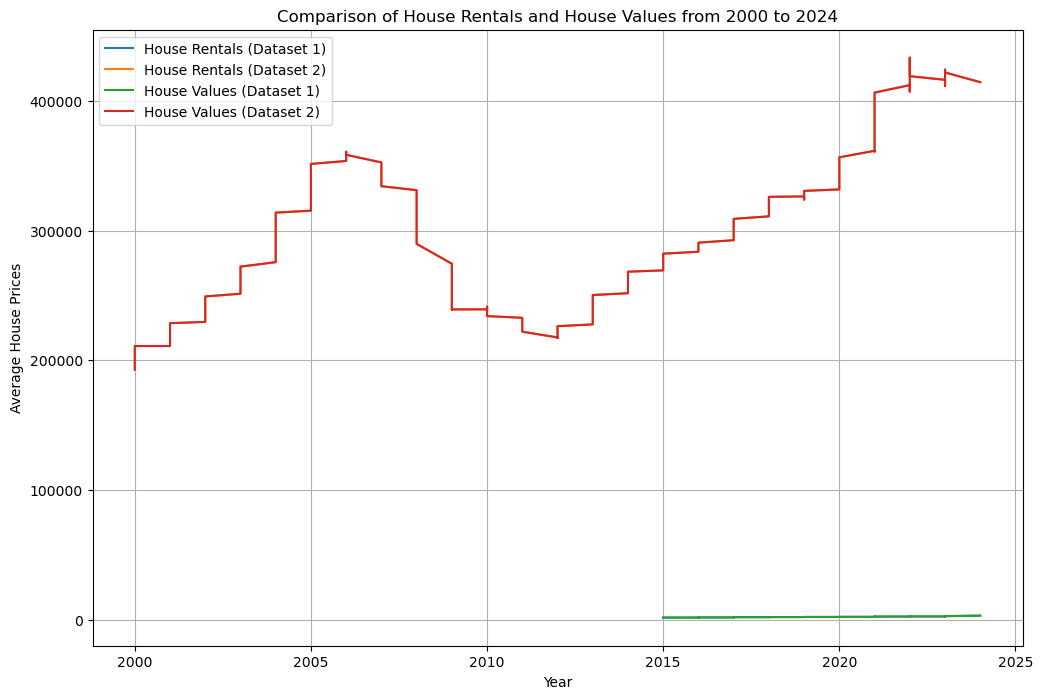

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the first Excel file
file1 = "avinash home rentals.xlsx"
df1 = pd.read_excel(file1)

# Load data from the second Excel file
file2 = "avinash home values.xlsx"
df2 = pd.read_excel(file2)

# Extract columns representing dates and mean house rental prices from the first dataset
X_rentals_1 = pd.to_datetime(df1.columns[4:], errors='coerce').year
y_rentals_1 = df1.iloc[:, 4:].mean(axis=0)  # Mean house rental prices for each month

# Extract columns representing dates and mean house rental prices from the second dataset
X_rentals_2 = pd.to_datetime(df2.columns[4:], errors='coerce').year
y_rentals_2 = df2.iloc[:, 4:].mean(axis=0)  # Mean house rental prices for each month

# Extract columns representing dates and mean house values from the first dataset
X_values_1 = pd.to_datetime(df1.columns[4:], errors='coerce').year
y_values_1 = df1.iloc[:, 4:].mean(axis=0)  # Mean house values for each month

# Extract columns representing dates and mean house values from the second dataset
X_values_2 = pd.to_datetime(df2.columns[4:], errors='coerce').year
y_values_2 = df2.iloc[:, 4:].mean(axis=0)  # Mean house values for each month

# Plotting the comparison of house rentals and house values against the year.
plt.figure(figsize=(12, 8))

# Plot lines for house rentals
plt.plot(X_rentals_1, y_rentals_1, label='House Rentals (Dataset 1)')
plt.plot(X_rentals_2, y_rentals_2, label='House Rentals (Dataset 2)')

# Plot lines for house values
plt.plot(X_values_1, y_values_1, label='House Values (Dataset 1)')
plt.plot(X_values_2, y_values_2, label='House Values (Dataset 2)')

plt.xlabel('Year')
plt.ylabel('Average House Prices')
plt.title('Comparison of House Rentals and House Values from 2000 to 2024')
plt.legend()
plt.grid(True)
plt.show()


In [92]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load data from the first Excel file
file1 = "avinash home rentals.xlsx"
df1 = pd.read_excel(file1)

# Load data from the second Excel file
file2 = "avinash home values.xlsx"
df2 = pd.read_excel(file2)

# Extract columns representing dates and mean house rental prices from the first dataset
X_rentals_1 = pd.to_datetime(df1.columns[4:], errors='coerce').year.values.reshape(-1, 1)
y_rentals_1 = df1.iloc[:, 4:].mean(axis=0).values.reshape(-1, 1)  # Mean house rental prices for each month

# Extract columns representing dates and mean house rental prices from the second dataset
X_rentals_2 = pd.to_datetime(df2.columns[4:], errors='coerce').year.values.reshape(-1, 1)
y_rentals_2 = df2.iloc[:, 4:].mean(axis=0).values.reshape(-1, 1)  # Mean house rental prices for each month

# Extract columns representing dates and mean house values from the first dataset
X_values_1 = pd.to_datetime(df1.columns[4:], errors='coerce').year.values.reshape(-1, 1)
y_values_1 = df1.iloc[:, 4:].mean(axis=0).values.reshape(-1, 1)  # Mean house values for each month

# Extract columns representing dates and mean house values from the second dataset
X_values_2 = pd.to_datetime(df2.columns[4:], errors='coerce').year.values.reshape(-1, 1)
y_values_2 = df2.iloc[:, 4:].mean(axis=0).values.reshape(-1, 1)  # Mean house values for each month

# Perform linear regression for house rentals (Dataset 1)
model_rentals_1 = LinearRegression()
model_rentals_1.fit(X_rentals_1, y_rentals_1)
y_pred_rentals_1 = model_rentals_1.predict(X_rentals_1)
r2_rentals_1 = r2_score(y_rentals_1, y_pred_rentals_1)

# Perform linear regression for house rentals (Dataset 2)
model_rentals_2 = LinearRegression()
model_rentals_2.fit(X_rentals_2, y_rentals_2)
y_pred_rentals_2 = model_rentals_2.predict(X_rentals_2)
r2_rentals_2 = r2_score(y_rentals_2, y_pred_rentals_2)

# Perform linear regression for house values (Dataset 1)
model_values_1 = LinearRegression()
model_values_1.fit(X_values_1, y_values_1)
y_pred_values_1 = model_values_1.predict(X_values_1)
r2_values_1 = r2_score(y_values_1, y_pred_values_1)

# Perform linear regression for house values (Dataset 2)
model_values_2 = LinearRegression()
model_values_2.fit(X_values_2, y_values_2)
y_pred_values_2 = model_values_2.predict(X_values_2)
r2_values_2 = r2_score(y_values_2, y_pred_values_2)

print("R-squared for House Rentals (Dataset 1):", r2_rentals_1)
print("R-squared for House Rentals (Dataset 2):", r2_rentals_2)
print("R-squared for House Values (Dataset 1):", r2_values_1)
print("R-squared for House Values (Dataset 2):", r2_values_2)


R-squared for House Rentals (Dataset 1): 0.9547302950672025
R-squared for House Rentals (Dataset 2): 0.3645944016987597
R-squared for House Values (Dataset 1): 0.9547302950672025
R-squared for House Values (Dataset 2): 0.3645944016987597


In [94]:
import pandas as pd
import statsmodels.api as sm

# Load data from the first Excel file (House Rentals)
file1 = "avinash home rentals.xlsx"
df1 = pd.read_excel(file1)

# Load data from the second Excel file (House Values)
file2 = "avinash home values.xlsx"
df2 = pd.read_excel(file2)

# Extract columns representing dates and mean house rental prices from the first dataset
X_rentals = pd.to_datetime(df1.columns[4:], errors='coerce').year
y_rentals = df1.iloc[:, 4:].mean(axis=0)  # Mean house rental prices for each month

# Extract columns representing dates and mean house values from the second dataset
X_values = pd.to_datetime(df2.columns[4:], errors='coerce').year
y_values = df2.iloc[:, 4:].mean(axis=0)  # Mean house values for each month

# Perform OLS regression for house rentals
X_rentals = sm.add_constant(X_rentals)
model_rentals = sm.OLS(y_rentals, X_rentals)
results_rentals = model_rentals.fit()

# Perform OLS regression for house values
X_values = sm.add_constant(X_values)
model_values = sm.OLS(y_values, X_values)
results_values = model_values.fit()

print("Regression Summary for House Rentals:")
print(results_rentals.summary())

print("\nRegression Summary for House Values:")
print(results_values.summary())


Regression Summary for House Rentals:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     2257.
Date:                Sat, 04 May 2024   Prob (F-statistic):           9.59e-74
Time:                        18:11:07   Log-Likelihood:                -626.00
No. Observations:                 109   AIC:                             1256.
Df Residuals:                     107   BIC:                             1261.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.

# Testing

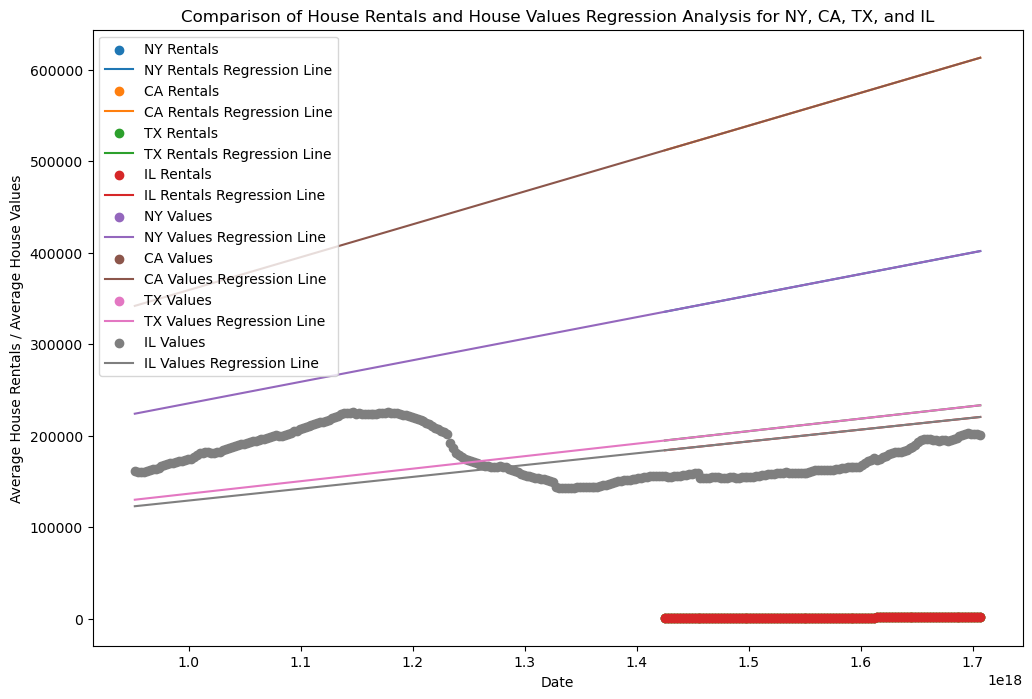

In [25]:
# Plotting both regression lines for comparison
plt.figure(figsize=(12, 8))

# Plotting house rentals regression lines
for state, model in regression_results.items():
    X_rentals = pd.to_numeric(pd.to_datetime(state_data.columns[4:], errors='coerce'), errors='coerce')
    y_rentals = state_data.iloc[:, 4:].mean(axis=0)
    plt.scatter(X_rentals, y_rentals, label=f"{state} Rentals")
    plt.plot(X_rentals, model.predict(sm.add_constant(X_rentals)), label=f"{state} Rentals Regression Line")

# Plotting house values regression lines
for state, model in regression_results.items():
    X_values = pd.to_numeric(pd.to_datetime(state_data2.columns[4:], errors='coerce'), errors='coerce')
    state_data2_state = state_data2[state_data2['StateName'] == state]
    y_values = state_data2_state.iloc[:, 4:].mean(axis=0)
    plt.scatter(X_values, y_values, label=f"{state} Values")
    plt.plot(X_values, model.predict(sm.add_constant(X_values)), label=f"{state} Values Regression Line")

plt.title("Comparison of House Rentals and House Values Regression Analysis for NY, CA, TX, and IL")
plt.xlabel("Date")
plt.ylabel("Average House Rentals / Average House Values")
plt.legend()
plt.show()


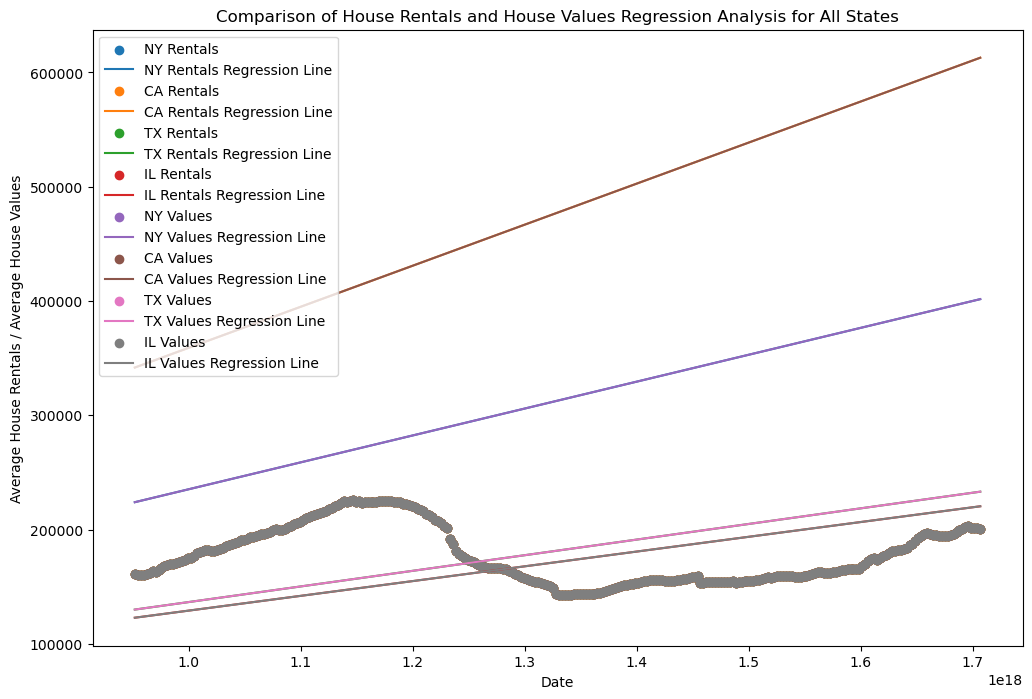

In [45]:
# Plotting both regression lines for comparison
plt.figure(figsize=(12, 8))

# Plotting house rentals regression lines
for state, model in regression_results.items():
    X_rentals = pd.to_numeric(pd.to_datetime(state_data.columns[4:], errors='coerce'), errors='coerce')
    y_rentals = state_data.iloc[:, 4:].mean(axis=0)
    plt.scatter(X_rentals, y_rentals, label=f"{state} Rentals")
    plt.plot(X_rentals, model.predict(sm.add_constant(X_rentals)), label=f"{state} Rentals Regression Line")

# Plotting house values regression lines for all states
for state, model in regression_results.items():
    X_values = pd.to_numeric(pd.to_datetime(state_data2.columns[4:], errors='coerce'), errors='coerce')
    state_data2_state = state_data2[state_data2['StateName'] == state]
    y_values = state_data2_state.iloc[:, 4:].mean(axis=0)
    plt.scatter(X_values, y_values, label=f"{state} Values")
    plt.plot(X_values, model.predict(sm.add_constant(X_values)), label=f"{state} Values Regression Line")

plt.title("Comparison of House Rentals and House Values Regression Analysis for All States")
plt.xlabel("Date")
plt.ylabel("Average House Rentals / Average House Values")
plt.legend()
plt.show()
